# Preparing data

In [33]:
!bash load_data.sh

100%|█████████████████████████████████████▉| 17.1G/17.1G [09:21<00:00, 37.5MB/s]
100%|██████████████████████████████████████| 17.1G/17.1G [09:21<00:00, 32.8MB/s]


In [34]:
from utils.data_preprocessing import DataPreprocessor

preprocessor = DataPreprocessor("rtsd-dataset", "rtsd-frames/rtsd-frames")
preprocessor.preprocess()

Annotations /home/eugene/Documents/traffic sign detection/datasets/train_annotation/train_anno.json: 100%|██████████| 54188/54188 [00:04<00:00, 11420.58it/s]


  0%|          | 0/54188 [00:00<?, ?it/s]

Annotations /home/eugene/Documents/traffic sign detection/datasets/val_annotation/val_anno.json: 100%|██████████| 5000/5000 [00:00<00:00, 13551.92it/s]


  0%|          | 0/5000 [00:00<?, ?it/s]

Data was successfully converted to YOLO format. The dataset contains 54188 train images and 5000 val images


# Training model

In [49]:
!nvidia-smi

Thu Nov 23 11:34:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 0000D502:00:00.0 Off |                  N/A |
| 36%   51C    P2   111W / 350W |  21384MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
MODEL_NAME = "yolov8m"

In [3]:
from utils.project_utils import get_model

model = get_model(version="", model_name=MODEL_NAME)

In [ ]:
results = model.train(
    data="trafic_signs.yaml", imgsz=640, epochs=100, batch=24, device=0, name=MODEL_NAME
)

# Inference

In [2]:
MODEL_NAME = "yolov8m"

In [16]:
import pandas as pd
from label2name import Mapper
from utils.project_utils import get_model

model = get_model(version="", model_name=MODEL_NAME)
signs = pd.read_csv("traffic_signs.csv")
mapper = Mapper(signs, labels_path="rtsd-dataset/labels.txt")
mapper.create()

INFO:root:Mapping saved to mapping.json


In [17]:
from inference import Detector

detector = Detector(model, mapper)

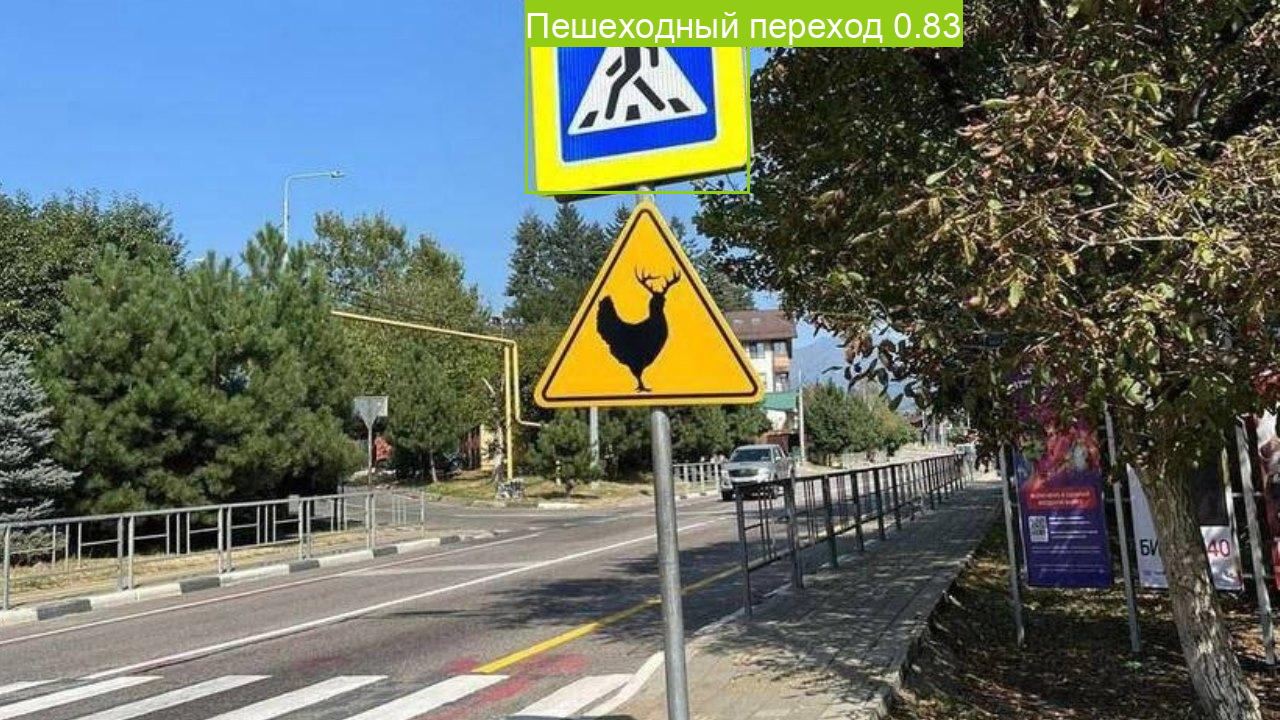

In [18]:
# single image
from PIL import Image

annotated_frame = detector.process_frame("test_img.jpg")
display(Image.fromarray(annotated_frame[:, :, ::-1]))

In [19]:
# video
detector.process_video("test_video.mp4", conf=0.6)

INFO:root:Annotated video saved to test_video_annotated.mp4
